In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

#Cargar los datos de MNIST
#Aqui lo hago de otra manera porque es mas simple para poder usar el modulo de aumento de datos
#de Keras de esta manera
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
#Colocar los datos en la forma correcta que ya hemos visto (1, 28, 28, 1)
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)

#Hacer 'one-hot encoding' de los resultados (e.g. en lugar de tener
#como resultado una sola neurona, tendre 10 donde solo el resultado correcto sera 1 y el resto 0)
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

#Convertir a flotante y normalizar para que aprenda mejor la red
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

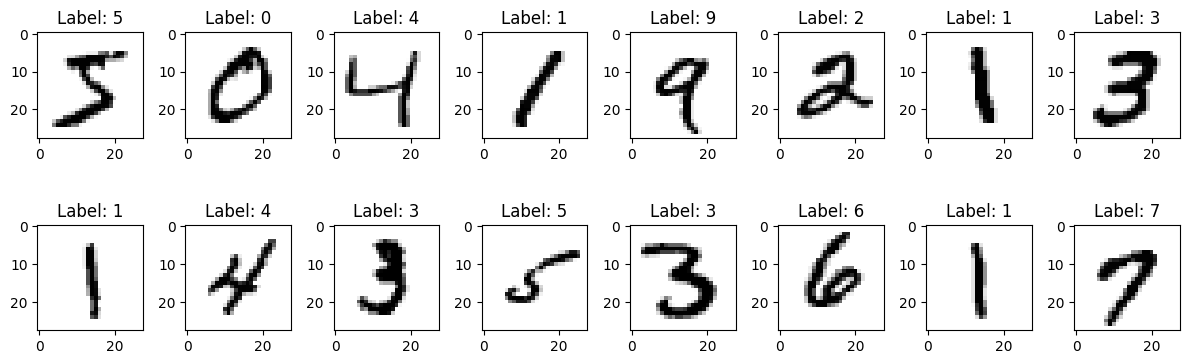

In [3]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt
filas = 2
columnas = 8
num = filas*columnas
imagenes = X_entrenamiento[0:num]
etiquetas = Y_entrenamiento[0:num]
fig, axes = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes[i//columnas, i%columnas]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

In [4]:
#Aumento de datos
#Variables para controlar las transformaciones que se haran en el aumento de datos
#utilizando ImageDataGenerator de keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
#rango_inclinacion=15 #No uso este de momento pero si quieres puedes probar usandolo!
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    #shear_range=rango_inclinacion #No uso este de momento pero si quieres puedes probar usandolo!
)

datagen.fit(X_entrenamiento)

ANTES:



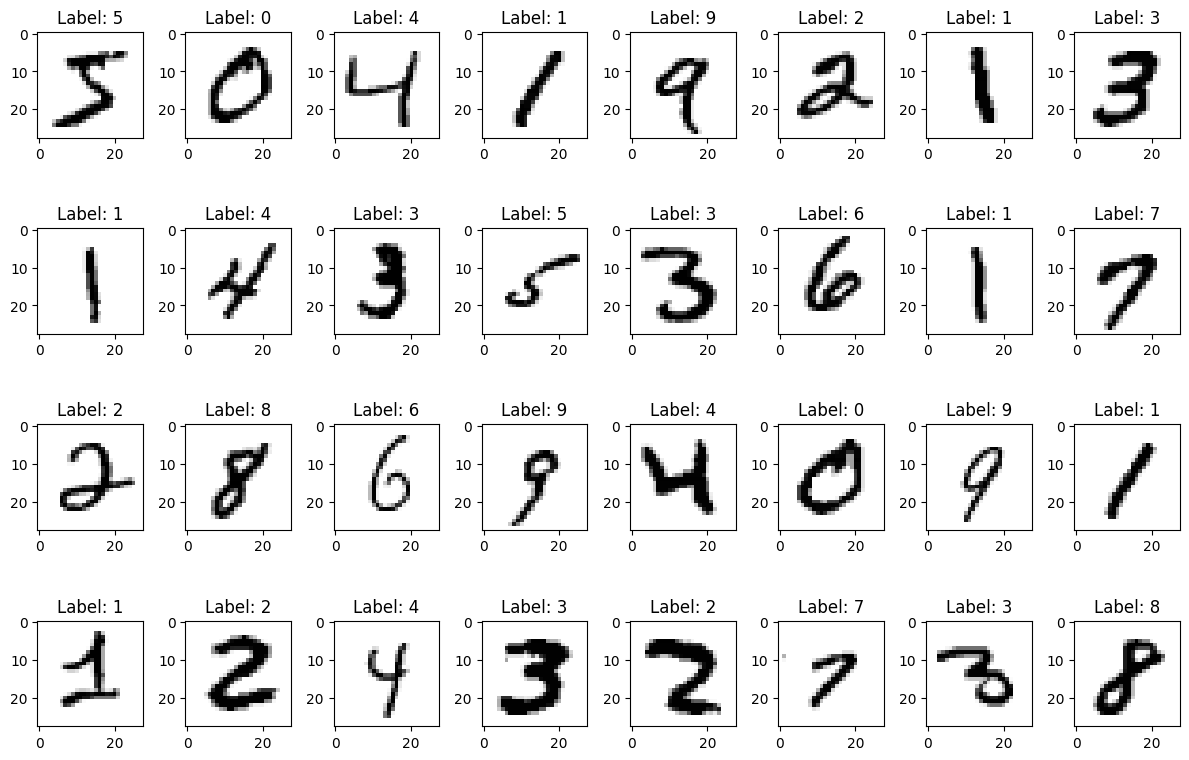

DESPUES:



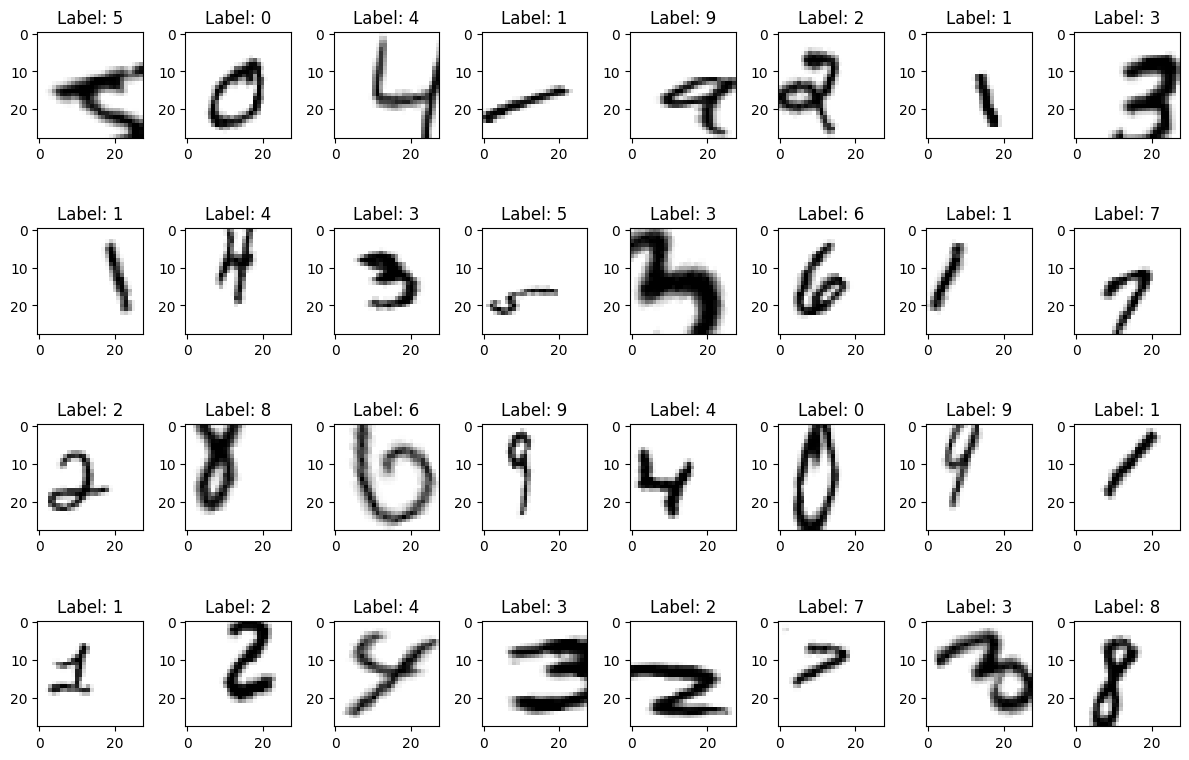

In [5]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime como se ven antes y despues de las transformaciones
filas = 4
columnas = 8
num = filas*columnas
print('ANTES:\n')
fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes1[i//columnas, i%columnas]
     ax.imshow(X_entrenamiento[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(Y_entrenamiento[i])))
plt.tight_layout()
plt.show()
print('DESPUES:\n')
fig2, axes2 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for X, Y in datagen.flow(X_entrenamiento,Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//columnas, i%columnas]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
     break
plt.tight_layout()
plt.show()

In [6]:
#Modelo!
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compilación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#Los datos para entrenar saldran del datagen, de manera que sean generados con las transformaciones que indicamos
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [9]:
TAMANO_LOTE = 32

#Entrenar la red. Toma un buen rato! Ve por un café ;)
#Oye suscribete al canal!
print("Entrenando modelo...");
epocas=60
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_pruebas, Y_pruebas),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.9479 - accuracy: 0.6905 - val_loss: 0.1604 - val_accuracy: 0.9576
Epoch 2/60
1875/1875 [==============================] - 29s 16ms/step - loss: 0.6593 - accuracy: 0.7865 - val_loss: 0.1483 - val_accuracy: 0.9582
Epoch 3/60
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5693 - accuracy: 0.8165 - val_loss: 0.1218 - val_accuracy: 0.9632
Epoch 4/60
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5185 - accuracy: 0.8322 - val_loss: 0.1059 - val_accuracy: 0.9680
Epoch 5/60
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4856 - accuracy: 0.8427 - val_loss: 0.0991 - val_accuracy: 0.9687
Epoch 6/60
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4556 - accuracy: 0.8531 - val_loss: 0.0731 - val_accuracy: 0.9761
Epoch 7/60
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4413 - accuracy: 0.8571